In this project of Avacados we are been given a dataseet consisting of average price, 
the region sold and many other things, so that we can predict the region or the average price accordingly.
The Target variable has continuous values so we will be going we with the Linear Regression in the further part of model building.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
av=pd.read_csv('avacados.csv', parse_dates=['Date'])
av.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-08-11,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-01-11,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [3]:
av.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [4]:
ad=av.drop(['Unnamed: 0', 'Date'], axis=1)

In [5]:
ad.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Converting the categorical data into numerical data as it must for the model.

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ad['region']=le.fit_transform(ad['region'])
ad['type']=le.fit_transform(ad['type'])

In [7]:
ad.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


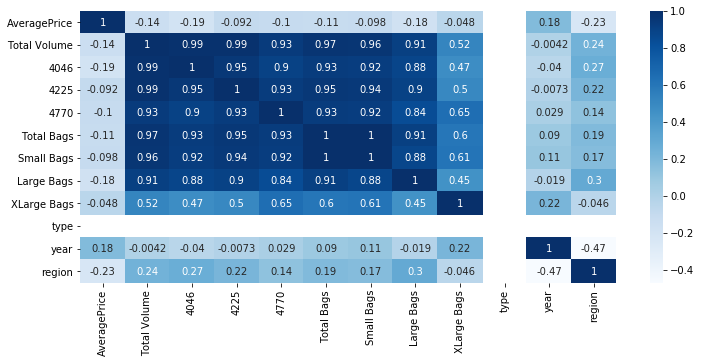

In [8]:
plt.figure(figsize=(12,5))
sns.heatmap(ad.corr(), annot=True, cmap='Blues')

In [9]:
ad.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

In [10]:
ad.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

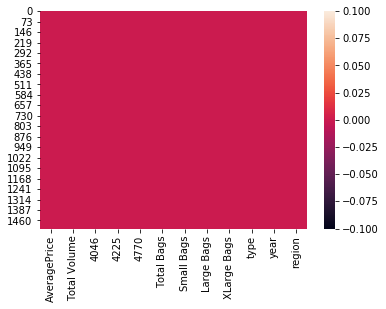

In [11]:
sns.heatmap(ad.isnull())

Moving on to the EDA analysis.

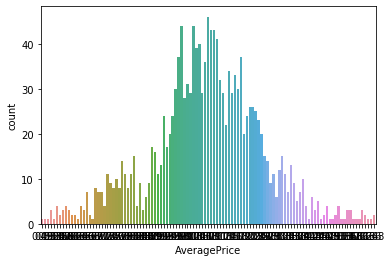

In [12]:
sns.countplot(x='AveragePrice', data=ad)

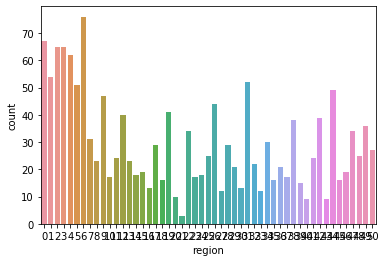

In [13]:
sns.countplot(x='region', data=ad)

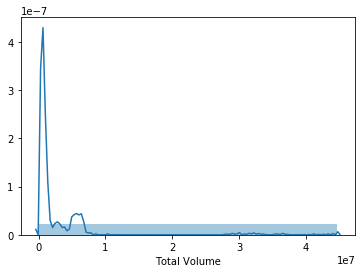

In [14]:
sns.distplot(ad['Total Volume'], bins=1)

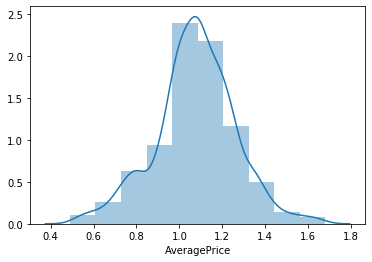

In [15]:
sns.distplot(ad['AveragePrice'], bins=10)

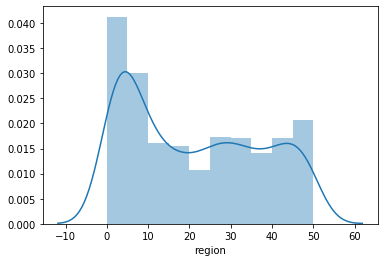

In [16]:
sns.distplot(ad['region'], bins=10)

In [17]:
ad.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
dtype: float64

(array([1.35e+03, 1.41e+02, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        9.00e+00, 1.00e+01, 4.00e+00, 2.00e+00]),
 array([3.87507400e+04, 4.50042182e+06, 8.96209289e+06, 1.34237640e+07,
        1.78854350e+07, 2.23471061e+07, 2.68087772e+07, 3.12704483e+07,
        3.57321194e+07, 4.01937904e+07, 4.46554615e+07]),
 <a list of 10 Patch objects>)

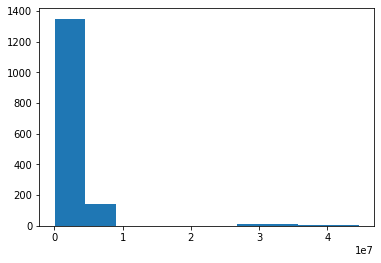

In [18]:
plt.hist(ad['Total Volume'], bins=10)

(array([1.365e+03, 7.800e+01, 3.400e+01, 1.400e+01, 1.000e+00, 0.000e+00,
        6.000e+00, 1.200e+01, 5.000e+00, 2.000e+00]),
 array([3.31177000e+03, 5.92344765e+05, 1.18137776e+06, 1.77041075e+06,
        2.35944375e+06, 2.94847675e+06, 3.53750974e+06, 4.12654273e+06,
        4.71557573e+06, 5.30460872e+06, 5.89364172e+06]),
 <a list of 10 Patch objects>)

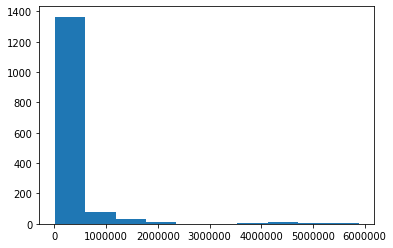

In [19]:
plt.hist(ad['Small Bags'], bins=10)

(array([313., 228., 122., 118.,  82., 131., 129., 107., 130., 157.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

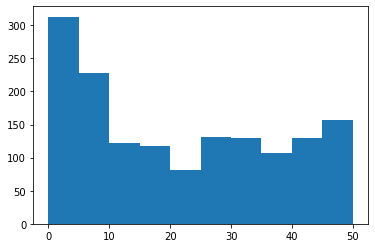

In [20]:
plt.hist(ad['region'], bins=10)

In [21]:
ac=ad.copy()
ac.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
dtype: float64

There is too much skewness in the data, so we need to remove it accordingly.

In [22]:
ac['Small Bags']=np.log1p(ac['Small Bags'])
ac['Large Bags']=np.log1p(ac['Large Bags'])
ac['XLarge Bags']=np.log1p(ac['XLarge Bags'])
ac['Total Bags']=np.log(ac['Total Bags'])
ac['4770']=np.log1p(ac['4770'])
ac['4046'] =np.log(ac['4046'])
ac['4225']=np.log(ac['4225'])
ac['Total Volume']=np.log(ac['Total Volume'])

In [23]:
ac.skew()

AveragePrice   -0.109444
Total Volume    0.667461
4046           -0.160523
4225            0.184359
4770           -0.355508
Total Bags      0.695445
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
year            1.828332
region          0.288146
dtype: float64

checking for the outliers and removing it using the zscore, all the values less than 3.

{'whiskers': [<matplotlib.lines.Line2D at 0xe272c88>,
 'caps': [<matplotlib.lines.Line2D at 0xe275c48>,
 'boxes': [<matplotlib.lines.Line2D at 0xe272488>],
 'medians': [<matplotlib.lines.Line2D at 0xe27bbc8>],
 'fliers': [<matplotlib.lines.Line2D at 0xe27bcc8>],
 'means': []}

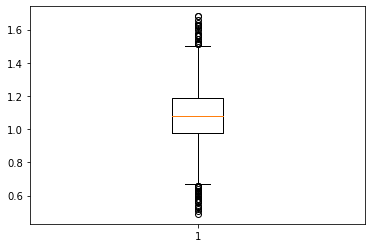

In [24]:
plt.boxplot(ac['AveragePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0xe2dc788>,
 'caps': [<matplotlib.lines.Line2D at 0xe2dcec8>,
 'boxes': [<matplotlib.lines.Line2D at 0xe2d5d88>],
 'medians': [<matplotlib.lines.Line2D at 0xe2e0fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0xe2e4e48>],
 'means': []}

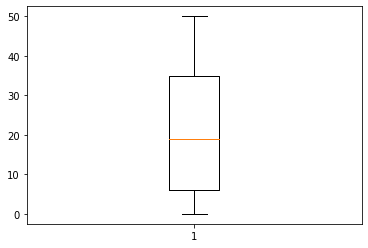

In [25]:
plt.boxplot(ac['region'])

{'whiskers': [<matplotlib.lines.Line2D at 0xe343308>,
 'caps': [<matplotlib.lines.Line2D at 0xe343bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0xe33e888>],
 'medians': [<matplotlib.lines.Line2D at 0xe347b48>],
 'fliers': [<matplotlib.lines.Line2D at 0xe34c9c8>],
 'means': []}

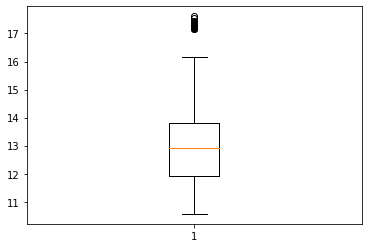

In [26]:
plt.boxplot(ac['Total Volume'])

In [27]:
ac.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [28]:
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
z=np.abs(zscore(ac))
print(np.where(z>3))

(array([ 760, 1182, 1182, 1182, 1183, 1183, 1183, 1184, 1184, 1184, 1185,
       1185, 1185, 1186, 1186, 1186, 1187, 1188, 1188, 1188, 1189, 1189,
       1191, 1202, 1346, 1411, 1457, 1458], dtype=int64), array([0, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 6, 1, 5, 6, 1, 5,
       5, 1, 4, 0, 0, 0], dtype=int64))


In [29]:
z[760][0]

3.097989311954043

In [30]:
ac.shape

(1517, 12)

In [31]:
ad=ac[(z>3)]
ad

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
760,0.49,13.944526,13.512126,12.566744,9.362500,11.521804,11.166908,10.313734,0.000000,0,2015,31
1182,1.02,17.391630,16.503331,16.399090,14.097997,15.681777,15.523510,13.707957,10.782779,0,2015,48
1182,1.02,17.391630,16.503331,16.399090,14.097997,15.681777,15.523510,13.707957,10.782779,0,2015,48
1182,1.02,17.391630,16.503331,16.399090,14.097997,15.681777,15.523510,13.707957,10.782779,0,2015,48
1183,0.98,17.427133,16.611797,16.366596,13.897167,15.723022,15.589385,13.619983,9.916578,0,2015,48
1183,0.98,17.427133,16.611797,16.366596,13.897167,15.723022,15.589385,13.619983,9.916578,0,2015,48
1183,0.98,17.427133,16.611797,16.366596,13.897167,15.723022,15.589385,13.619983,9.916578,0,2015,48
1184,1.00,17.414192,16.620675,16.347799,13.950668,15.654983,15.484078,13.757878,10.706812,0,2015,48
1184,1.00,17.414192,16.620675,16.347799,13.950668,15.654983,15.484078,13.757878,10.706812,0,2015,48
1184,1.00,17.414192,16.620675,16.347799,13.950668,15.654983,15.484078,13.757878,10.706812,0,2015,48


In [32]:
x=ad.iloc[:,1:]
y=ad.iloc[:,0]

In [33]:
from sklearn.decomposition import PCA
pca=PCA()
x=pca.fit_transform(x)

In [34]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
max_scr=0
for rstate in range(1,45):
    x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=rstate, test_size=0.30)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_y=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred_y)
    if r2_scr>max_scr:
        max_scr=r2_scr
        final_rstate=rstate
        
print('The corresponding value for maximum rstate',final_rstate, 'to the r2 Score is', max_scr)

The corresponding value for maximum rstate 4 to the r2 Score is 0.726099169480257


In [36]:
from sklearn.model_selection import cross_val_score
cr_val_scr=cross_val_score(lr,x,y,cv=10, scoring='r2').mean()
cr_val_scr

-17.355266173804484

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
alpha_value={'alpha':[1,0.1,0.01,0.001]}
model=Ridge(),Lasso()
for m in model:
    grid=GridSearchCV(estimator=m, param_grid=alpha_value, cv=5)
    grid.fit(x,y)
    print(grid.best_params_)
    print(grid.best_score_)

{'alpha': 1}
-0.526139053325393
{'alpha': 0.001}
0.38894682953821247


In [38]:
rg=Ridge(alpha=1)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)
pred_y=rg.predict(x_test)
r2_scrrg=r2_score(y_test,pred_y)
print('r2 score',r2_scrrg)
print(mean_squared_error(y_test,pred_y))

r2 score -0.06464986784467475
0.08578895550057426


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.1,0.01,0.001,0.0001], 'n_estimators':[100,200,500,1000]}
grrb=GridSearchCV(gbr,parameters,cv=5)
grrb.fit(x,y)
grrb.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [40]:
gbr=GradientBoostingRegressor(learning_rate=0.001, n_estimators=500)
print('The cross Val Score',cross_val_score(gbr,x,y,cv=5, scoring='r2').mean())

The cross Val Score -1.3986663681156213


In [41]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.1,0.01,0.001,0.0001], 'n_estimators':[100,200,500,1000], 'base_estimator':[rg]}
grad=GridSearchCV(ada_reg,parameters,cv=5)
grad.fit(x,y)
grad.best_params_

{'base_estimator': Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
       random_state=None, solver='auto', tol=0.001),
 'learning_rate': 0.1,
 'n_estimators': 1000}

In [42]:
gbra=AdaBoostRegressor(learning_rate=0.01, n_estimators=100, base_estimator=rg)
print('The cross Val Score',cross_val_score(gbra,x,y,cv=10, scoring='r2').mean())

The cross Val Score 0.24724642380520678


In [43]:
gbra=AdaBoostRegressor(learning_rate=0.01, n_estimators=100, base_estimator=rg)
gbra.fit(x_train,y_train)
gbra.score(x_train,y_train)
pred_y=gbra.predict(x_test)
r2_scrrg=r2_score(y_test,pred_y)
print('r2 score',r2_scrrg)
print(mean_squared_error(y_test,pred_y))


r2 score -0.04687481531335913
0.08435665063050794


In [44]:
x_n=ad.iloc[:,0:-1]
y_n=ad.iloc[:,-1]
y_n

760     31
1182    48
1182    48
1182    48
1183    48
1183    48
1183    48
1184    48
1184    48
1184    48
1185    48
1185    48
1185    48
1186    48
1186    48
1186    48
1187    48
1188    48
1188    48
1188    48
1189    48
1189    48
1191    48
1202    48
1346     3
1411     5
1457     6
1458     6
Name: region, dtype: int32

In [45]:
from sklearn.decomposition import PCA
pca=PCA()
x_n=pca.fit_transform(x_n)

In [46]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x_n=sd.fit_transform(x_n)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
max_scr=0
for rstate in range(42,100):
    x_n_test,x_n_train,y_n_test,y_n_train=train_test_split(x_n,y_n,random_state=rstate, test_size=0.30)
    lrn=LinearRegression()
    lrn.fit(x_n_train,y_n_train)
    pred_yl=lr.predict(x_n_test)
    r2_scr=r2_score(y_n_test,pred_yl)
    if r2_scr>max_scr:
        max_scr=r2_scr
        final_rstate=rstate
        
print('The corresponding value for maximum rstate',final_rstate, 'to the r2 Score is', max_scr)

The corresponding value for maximum rstate 68 to the r2 Score is 1.0


In [51]:
cross_val_scr=cross_val_score(lrn,x_n,y_n,scoring='r2', cv=5).mean()
cross_val_scr

-1.0418570105274785

In [49]:
ga=AdaBoostRegressor(learning_rate=0.01, n_estimators=100, base_estimator=rg)
ga.fit(x_n_train,y_n_train)
ga.score(x_n_train,y_n_train)
pred_y=ga.predict(x_n_test)
r2_scr=r2_score(y_n_test,pred_y)
print('r2 score',r2_scr)
print(mean_squared_error(y_n_test,pred_y))


r2 score -0.3235363379465257
404.7894736842105


In [53]:
df1=pd.DataFrame(pred_yl)
df1.to_csv('Lrn_prediction.csv')

In [55]:
from sklearn.externals import joblib
joblib.dump(lrn,'lrn_Avacados.pkl')

['lrn_Avacados.pkl']

In [ ]:
In this model Initally we considered the AveragePrice as the target variable, as we could see the r2score was around 70%
and cross_val_score was less and neagtive, therefore we went with the region as the target variable noticing 100% r2score and 
cross_val_score is negative showing some underfitting issue